In [2]:
import matplotlib 
import matplotlib.pyplot as plt
%matplotlib inline

import numpy as np 

In [3]:
import pandas as pd
url = "data/nhanes_2015_2016.csv"
da = pd.read_csv(url)

# Studying Discrete Values 

In [4]:
gender = da['RIAGENDR']
gender.value_counts()

2    2976
1    2759
Name: RIAGENDR, dtype: int64

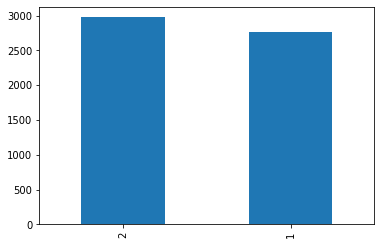

In [5]:
gender.value_counts().plot(kind='bar')
plt.show()

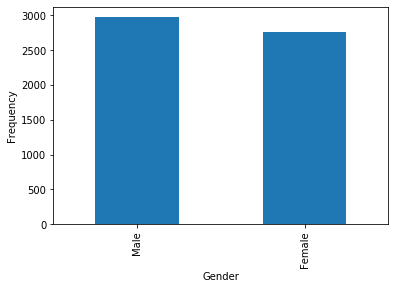

In [6]:
gender.value_counts().plot(kind='bar')
plt.xticks([0, 1], ['Male', 'Female'])
plt.xlabel("Gender")
plt.ylabel("Frequency")
plt.show()

### Most Common Value

In [7]:
sizes = np.array([22, 23, 29, 32, 39, 42, 42, 42, 42, 42, 42, 42, 42, 43, 44, 46, 51, 51, 55, 55, 57, 58, 78, 83, 97, 97])

In [8]:
sizes.mean()

49.84615384615385

In [9]:
from collections import Counter 
cnt = Counter()

for size in sizes: 
    cnt[size] += 1 
    
cnt.most_common()         # index 0 is the most common i.e. the mode 

[(42, 8),
 (51, 2),
 (55, 2),
 (97, 2),
 (22, 1),
 (23, 1),
 (29, 1),
 (32, 1),
 (39, 1),
 (43, 1),
 (44, 1),
 (46, 1),
 (57, 1),
 (58, 1),
 (78, 1),
 (83, 1)]

Alternative method: use the scipy library 

In [10]:
!pip install scipy

In [13]:
from scipy import stats
stats.mode(sizes)    # index 0 has value, index 1 has count 

ModeResult(mode=array([42]), count=array([8]))

In [14]:
gender.mode()   # not too useful since we could have got that from the bar chart anyway

0    2
dtype: int64

In [15]:
stats.mode(gender) 

ModeResult(mode=array([2]), count=array([2976]))

### More than One "Classes "

In [16]:
da['HIQ210'].unique()

array([ 2., nan,  1.,  9.])

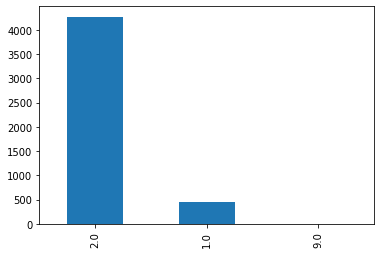

In [17]:
da['HIQ210'].value_counts().plot(kind='bar')
plt.show()

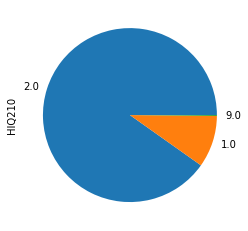

In [18]:
da['HIQ210'].value_counts().plot(kind='pie')  # highly NOT recommended! 
plt.show()

# Studying Real-Valued Numbers 

In [19]:
wt = da['BMXWT']

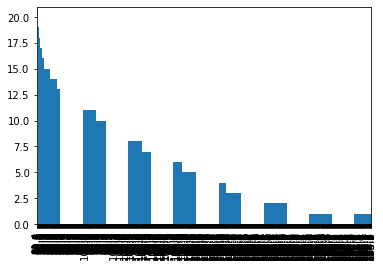

In [20]:
wt.value_counts().plot(kind='bar')    # this does not work at all 
plt.show()

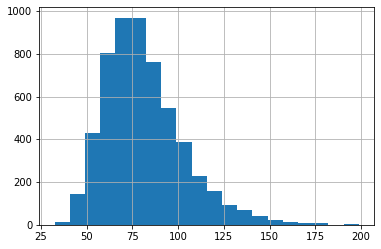

In [26]:
wt.hist(bins=20)
plt.show()

### Custom Matplotlib Histogram 

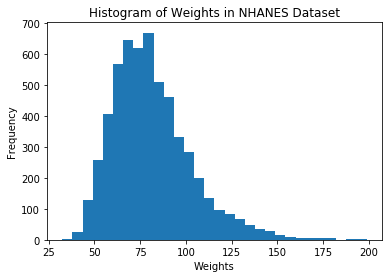

In [28]:
plt.hist(wt, bins=30) 
plt.ylabel('Frequency')
plt.xlabel('Weights');
plt.title("Histogram of Weights in NHANES Dataset")
plt.show()

### Prettifying and Styling Matplotlib with Seaborn

In [29]:
!pip install seaborn

In [30]:
import seaborn as sns
sns.set(color_codes=True)
sns.set_style("white")     # See more styling options here: https://seaborn.pydata.org/tutorial/aesthetics.html

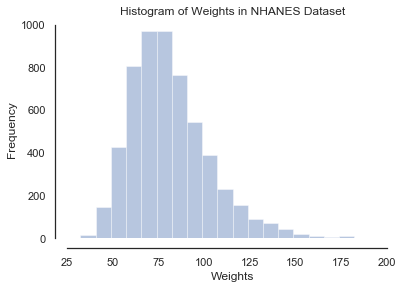

In [34]:
sns.distplot(wt, bins=20, kde=False )   #         # to get rid of the "trend line"
plt.ylabel('Frequency')
plt.xlabel('Weights');
plt.title("Histogram of Weights in NHANES Dataset")
sns.despine(offset=10, trim=True);  # move axes away 
plt.show()

See many more options about histograms with seaborn here: https://seaborn.pydata.org/tutorial/distributions.html

### Studying Central Tendency 

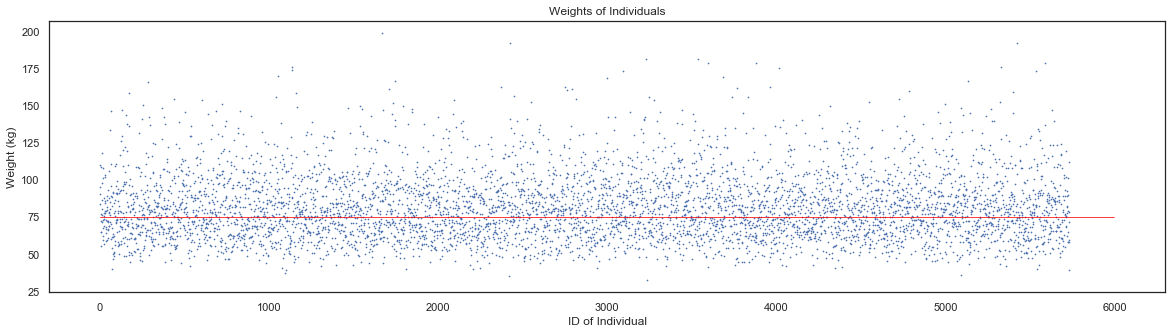

In [38]:
plt.figure(figsize=(20, 5)) 

x =  range(da['BMXWT'].size)
y =  da['BMXWT']

plt.scatter(x, y, marker='x', s=0.5)

plt.title("Weights of Individuals")
plt.xlabel("ID of Individual")
plt.ylabel("Weight (kg)")

# plot the estimate line 
p1 = (0, 75)
p2 = (6000, 75)
x_c, y_c = zip(p1, p2)
plt.plot(x_c, y_c, color='red', linewidth=0.75)
plt.show()

In [39]:
wt.mean() 

81.34267560889516

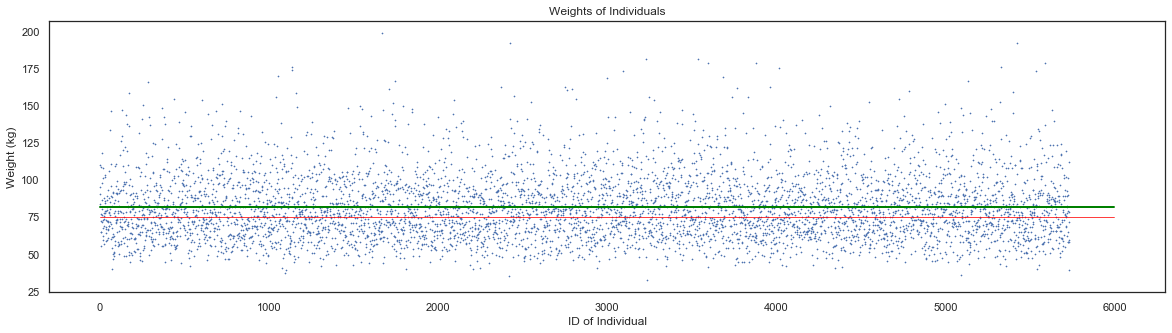

In [40]:
plt.figure(figsize=(20, 5)) 

x =  range(da['BMXWT'].size)
y =  da['BMXWT']

plt.scatter(x, y, marker='x', s=0.5)

plt.title("Weights of Individuals")
plt.xlabel("ID of Individual")
plt.ylabel("Weight (kg)")

# plot the estimate line 
x_c, y_c = ([0, 6000], [75, 75])
plt.plot(x_c, y_c, color='red', linewidth=0.75)

# plot the estimate line 
x_c, y_c = ([0, 6000], [wt.mean(), wt.mean()])
plt.plot(x_c, y_c, color='green', linewidth=2)

plt.show()

## Problem with Arithmetic Mean 

In [41]:
import numpy as np 

In [64]:
nums = np.array([3, 4, 9, 17, 18, 20, 22, 23, 29, 32, 39, 42, 42, 42, 51, 97])

In [65]:
np.mean(nums)

30.625

In [66]:
# let's try to do a different kind of average: the median! 
np.median(nums)

26.0

## Visualizing Weights Data 
The problem with our weights data is similar. 

In [67]:
wt.max()

198.9

In [68]:
wt.min()

32.4

In [69]:
wt.median()

78.2

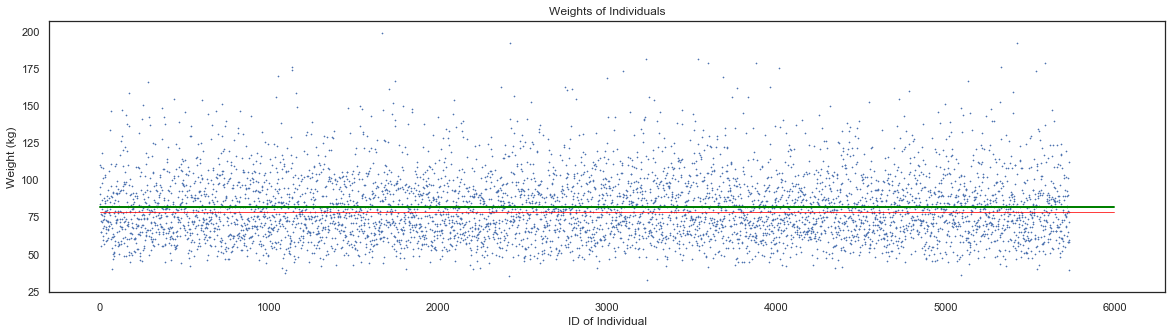

In [70]:
plt.figure(figsize=(20, 5)) 

x =  range(da['BMXWT'].size)
y =  da['BMXWT']

plt.scatter(x, y, marker='x', s=0.5)

plt.title("Weights of Individuals")
plt.xlabel("ID of Individual")
plt.ylabel("Weight (kg)")

# plot the estimate line 
x_c, y_c = ([0, 6000], [wt.median(), wt.median()])
plt.plot(x_c, y_c, color='red', linewidth=0.75)

# plot the estimate line 
x_c, y_c = ([0, 6000], [wt.mean(), wt.mean()])
plt.plot(x_c, y_c, color='green', linewidth=2)

plt.show()

### Quartiles and Boxplots 

In [71]:
nums = np.array([3, 4, 9, 17, 18, 20, 22, 23, 29, 32, 39, 42, 42, 42, 51, 97])

In [72]:
np.median(nums)

26.0

In [74]:
import statistics 

In [75]:
statistics.quantiles(nums, n=4)

[17.25, 26.0, 42.0]

In [76]:
statistics.quantiles(wt, n=4)

[43.7, 52.5, 50.1]

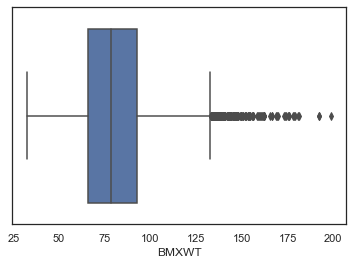

In [78]:
ax = sns.boxplot(x=wt)

In [80]:
male_wt = da.loc[da['RIAGENDR'] == 2, 'BMXWT']         
male_wt.mean()             # try .mean() 

76.51676280963693

In [82]:
female_wt = da.loc[da['RIAGENDR'] == 1, 'BMXWT']
female_wt.mean()

86.57326222876058

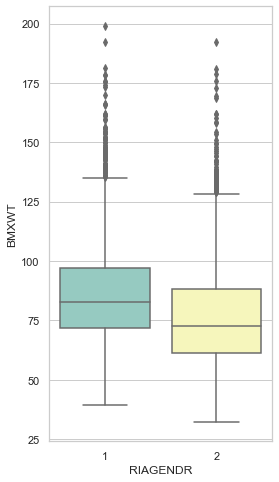

In [83]:
# But there's an easier way 
plt.figure(figsize=(4,8))
sns.set_style("whitegrid") 

ax = sns.boxplot(  x = "RIAGENDR", y = "BMXWT",           data=da               , palette="Set3")

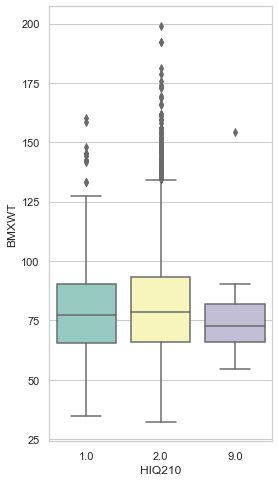

In [84]:
# But there's an easier way 
plt.figure(figsize=(4,8))
sns.set_style("whitegrid") 


ax = sns.boxplot(  x = "HIQ210", y = "BMXWT",           data=da               , palette="Set3")